<a href="https://colab.research.google.com/github/SALRIGO/pdm04/blob/main/py-tensorflow/Keras/%EC%BC%80%EB%9D%BC%EC%8A%A4%EC%9D%98_%ED%95%A8%EC%88%98%ED%98%95_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 함수형 API 튜토리얼입니다.  
링크 : https://wikidocs.net/38861

> 참고자료: https://teddylee777.github.io/tensorflow/functional-api

2021년 10월 12일에 마지막으로 테스트되었습니다.
- 2021년 11월 11일 보완.

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

# Keras Model API
- Sequential API
- Functional API
- Subclassing API
---
## 1. Sequential API

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# input-Output Model (No hidden layer)
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


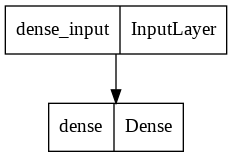

In [4]:
# Plt model
from tensorflow.keras.utils import plot_model
plot_model(model) #, show_shapes=True, show_layer_names=True, to_file='model_S.png')

## [DIY] 위의 모델에 hidden layer를 다음과 같이 추가하여 model_h1 을 만드시오.
- number of neurons: 10
- activation function; 'relu'


In [5]:
# Your model : model_h1
model_h1 = Sequential()
model_h1.add(Dense(10, input_dim=4, activation='relu'))
model_h1.add(Dense(3, activation='softmax'))
model_h1.summary()
model_h1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                50        
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


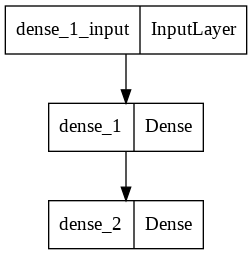

In [6]:
plot_model(model_h1) #, show_shapes=True, show_layer_names=True, to_file='model_S.png')

# 2. Functional API

## 2-1. FFNN (Feed-Forward Neural Networks)

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [9]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)  
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output)

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


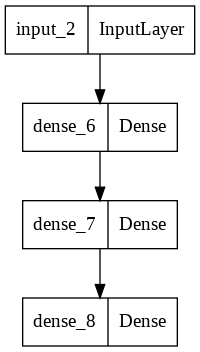

In [11]:
plot_model(model) #, show_shapes=True, show_layer_names=True, to_file='model_F.png')

## 2-2. Linear Regression
> 참고: https://wikidocs.net/111472

In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(learning_rate=0.01)

linear_model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
linear_model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 651ms/step - loss: 4029.4241 - mse: 4029.4241
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 496.8827 - mse: 496.8827
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 62.2285 - mse: 62.2285
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 8.7462 - mse: 8.7462
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 2.1643 - mse: 2.1643
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3531 - mse: 1.3531
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2520 - mse: 1.2520
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2383 - mse: 1.2383
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2353 - mse: 1.2353
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2337 - mse: 1.2337
Epoch 11/300
1/1 [==============================] - 0s 5ms/step -

In [13]:
linear_model.get_config()

{'input_layers': [['input_3', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 1),
    'dtype': 'float32',
    'name': 'input_3',
    'ragged': False,
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_3'},
  {'class_name': 'Dense',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_9',
    'trainable': True,
    'units': 1,
    'use_bias': True},
   'inbound_nodes': [[['input_3', 0, 0, {}]]],
   'name': 'dense_9'}],
 'name': 'model_2',
 'output_layers': [['dense_9', 0, 0]]}

In [14]:
linear_model.predict([11,15])

array([[118.11701],
       [160.67598]], dtype=float32)

In [15]:
X

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
linear_model.predict(X)

array([[11.719582],
       [22.359324],
       [32.999065],
       [43.63881 ],
       [54.278553],
       [64.9183  ],
       [75.558044],
       [86.197784],
       [96.837524]], dtype=float32)

In [17]:
import matplotlib.pyplot as plt

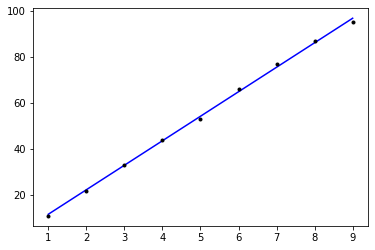

In [18]:
plt.plot(X, linear_model.predict(X), 'b', X, y, 'k.')
plt.show()

## 2-3. Logisitic Regression

In [19]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)
logistic_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## 2-4. model that accepts multiple inputs


In [20]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

multi_model = Model(inputs=[x.input, y.input], outputs=z)
multi_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 64)           8256        ['input_6[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 16)           1040        ['input_5[0][0]']                
                                                                                            

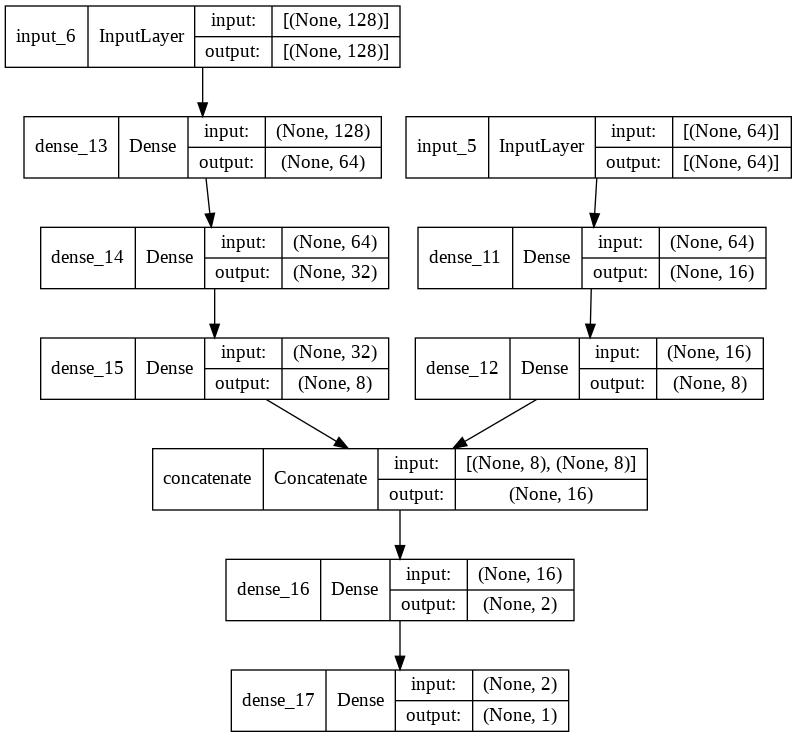

In [23]:
#  Plot model
plot_model(multi_model , show_shapes=True, show_layer_names=True, to_file='model_M.png')

## 2-5. LSTM

In [27]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

lstm_model = Model(inputs=inputs, outputs=output)
lstm_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


## Number of parameters in an lstm layer
> 4 * lstm_hidden_state_size * (lstm_inputs_size + bias_variable + lstm_outputs_size) 
- lstm_hidden_state_size = 10
- lstm_inputs_size = 1
- bias_variable = 1
- lstm_outputs_size = 10

>> 4*10(1 + 1 + 100 = 480

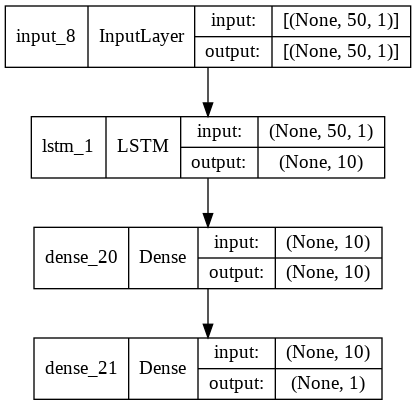

In [28]:
# Plot model
plot_model(lstm_model, show_shapes=True, show_layer_names=True, to_file='model_L.png')